#                                  Telecom Churn Case Study


In [358]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [359]:
data = pd.read_csv('telecom_churn_data.csv',sep=',', encoding='ISO-8859-1')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [360]:
data.shape

(99999, 226)

In [361]:
print(type(data['mobile_number'][0]))
print(len(data.mobile_number.unique()))

<class 'numpy.int64'>
99999


- All the row entries are unique, there are no duplicate entries

In [362]:
#let us check the values of the data which has more than 10%of the data missing
def showMissingData(df,minPercentMissing):
    x = pd.DataFrame(100*(round(df.isnull().sum()/len(df.index),2)))
    return x[x[0]>minPercentMissing]

In [363]:
# Show % of data missing in columns data, with missing values greater than 0
y = showMissingData(data,0)
y

,0
loc_og_t2o_mou,1.0
std_og_t2o_mou,1.0
loc_ic_t2o_mou,1.0
last_date_of_month_7,1.0
last_date_of_month_8,1.0
last_date_of_month_9,2.0
onnet_mou_6,4.0
onnet_mou_7,4.0
onnet_mou_8,5.0
onnet_mou_9,8.0


In [364]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [365]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [366]:
data.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [367]:
#Filtered all the columns for 6,7,8,9 months
fiteredColumns = [col for tag in ['6','7','8','9'] for col in data.columns if tag in col]
fiteredColumns

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'date_of_last_rech_data_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 

In [368]:
#Let us check other columns other than 6,7,8,9 months
otherColumns = [col for col in data.columns if col not in fiteredColumns]
otherColumns

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'sep_vbc_3g']

In [369]:
# column names [ 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'] will be changed back to original naming convention of _6,_7,_8,_9
data.rename(columns = {'aug_vbc_3g':'vbc_3g_8', 
                       'jul_vbc_3g':'vbc_3g_7', 
                       'jun_vbc_3g':'vbc_3g_6',
                       'sep_vbc_3g':'vbc_3g_9'}, inplace = True) 
data.columns.values


array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [370]:
#let us check the values of the data which has more than 10%of the data missing
y = showMissingData(data,10)
y

,0
date_of_last_rech_data_6,75.0
date_of_last_rech_data_7,74.0
date_of_last_rech_data_8,74.0
date_of_last_rech_data_9,74.0
total_rech_data_6,75.0
total_rech_data_7,74.0
total_rech_data_8,74.0
total_rech_data_9,74.0
max_rech_data_6,75.0
max_rech_data_7,74.0


### We can clearly see a pattern here for 6,7,8,9 months 
### 75% missing value for 6th month,74 percent missing values for 7,8,9 months


In [371]:
y.index.values

array(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'fb_user_9'], dtype=object)

## let us impute values only for recharge amount data of the first 2 months ('good phase') and filter the High value customers and check for some pattern to impute the values.


#### high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [372]:
# imputing 0 for the recharge amount data of the 1st 2 months
cols = ['total_rech_amt_6', 'total_rech_amt_7','av_rech_amt_data_6', 'av_rech_amt_data_7']
data[cols] = data[cols].fillna(0,axis=1)


In [373]:
HVC_Data=data[data[['total_rech_amt_6', 'total_rech_amt_7','av_rech_amt_data_6', 'av_rech_amt_data_7']].mean(axis=1)> data[['total_rech_amt_6', 'total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1).quantile(0.7)]

In [374]:
HVC_Data.shape

(29949, 226)

### from 99999 rows ,we ended up with 29949 rows of data

In [375]:
#let us check the values of the data which has more than 10%of the data missing
y = showMissingData(HVC_Data,10)
y

,0
date_of_last_rech_data_6,50.0
date_of_last_rech_data_7,49.0
date_of_last_rech_data_8,52.0
date_of_last_rech_data_9,53.0
total_rech_data_6,50.0
total_rech_data_7,49.0
total_rech_data_8,52.0
total_rech_data_9,53.0
max_rech_data_6,50.0
max_rech_data_7,49.0


#### After filtering the data for High value customers, we still see a pattern for 6,7,8,9 months....which is 50,49,52,53
#### Let us impute these values with 0,except date columns


In [376]:
y.index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [377]:
# imputing 0 for the recharge amount data of the 1st 2 months
cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'fb_user_9']
HVC_Data[cols] = HVC_Data[cols].fillna(0,axis=1)

In [378]:
#let us check the values of the data 
y = showMissingData(HVC_Data,0)
y

,0
loc_og_t2o_mou,1.0
std_og_t2o_mou,1.0
loc_ic_t2o_mou,1.0
last_date_of_month_8,1.0
last_date_of_month_9,1.0
onnet_mou_6,2.0
onnet_mou_7,2.0
onnet_mou_8,4.0
onnet_mou_9,6.0
offnet_mou_6,2.0


In [379]:
y.index.values

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_8', 'last_date_of_month_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
       'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t

#### Tag churners and remove attributes of the churn phase
##### attributes you need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9



In [380]:
checkPointData = HVC_Data.loc[:,['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

print(checkPointData.head())
#let us check the values of the data 
y = showMissingData(checkPointData,0)
print(y)

    total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0             0.00            0.00          0.0          0.0
7             0.00            0.00          0.0          0.0
8            34.91          142.18          0.0          0.0
16          334.56          255.74          0.0          0.0
21          252.61         1031.53          0.0          0.0
Empty DataFrame
Columns: [0]
Index: []


##### we dont have any missing data in the columns ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9'] which are used to tag the churners

Let us tag the churners

In [381]:
HVC_Data['churn'] = HVC_Data[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].apply(lambda x : 1 if ((x['total_ic_mou_9'] == 0) & (x['total_og_mou_9'] == 0) & (x['vol_2g_mb_9'] == 0) & (x['vol_3g_mb_9'] == 0) ) else 0,axis=1)

In [382]:
HVC_Data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,1.0,1.0,1.0,0.0,968,30.40,0.00,101.20,3.58,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0.0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0.0,1.0,1.0,0.0,315,21.03,910.65,122.16,0.00,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,0.0,0.0,0.0,0.0,511,0.00,2.45,21.89,0.00,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,0.0,0.0,0.0,0.0,720,0.00,0.00,0.00,0.00,0


## Since , we are done tagging the churners , let us delete all the columns for the month of September(9th month)

In [383]:
#Filtered all the columns for 6,7,8,9 months
fiteredColumns_9 = [col for col in HVC_Data.columns if '9' in col]
fiteredColumns_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [384]:
HVC_Data = HVC_Data.drop(fiteredColumns_9,axis=1)

In [385]:
HVC_Data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,...,0,0,0.0,0.0,0.0,511,0.00,2.45,21.89,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,...,0,0,0.0,0.0,0.0,720,0.00,0.00,0.00,0


In [386]:
y = showMissingData(HVC_Data,0)
y

,0
loc_og_t2o_mou,1.0
std_og_t2o_mou,1.0
loc_ic_t2o_mou,1.0
last_date_of_month_8,1.0
onnet_mou_6,2.0
onnet_mou_7,2.0
onnet_mou_8,4.0
offnet_mou_6,2.0
offnet_mou_7,2.0
offnet_mou_8,4.0


In [387]:
HVC_Data_numeric = HVC_Data.select_dtypes(include =['float64','int64']) 
HVC_Data_numeric.columns.values
HVC_Data_numeric.index

Int64Index([    0,     7,     8,    16,    21,    33,    38,    41,    48,
               53,
            ...
            99963, 99965, 99970, 99974, 99981, 99984, 99986, 99988, 99997,
            99998],
           dtype='int64', length=29949)

In [388]:
HVC_Data_numeric_temp = pd.DataFrame(HVC_Data['mobile_number'])

HVC_Data_numeric_temp['index1'] = HVC_Data_numeric_temp.index
HVC_Data_numeric_temp

,mobile_number,index1
0,7000842753,0
7,7000701601,7
8,7001524846,8
16,7000875565,16
21,7002124215,21
33,7000149764,33
38,7000815202,38
41,7000721289,41
48,7000294396,48
53,7002188521,53


In [389]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(missing_values=np.nan, sample_posterior=False, 
                                 max_iter=10, tol=0.001, 
                                 n_nearest_features=4, initial_strategy='median')
imp.fit(HVC_Data_numeric)
imputed_data = pd.DataFrame(data=imp.transform(HVC_Data_numeric), 
                             columns=HVC_Data_numeric.columns,
                             dtype='float64')

In [390]:
imputed_data = HVC_Data_numeric_temp.merge(imputed_data, how='outer',on='mobile_number')

imputed_data.head()

,mobile_number,index1,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
0,7000842753,0,109.0,0.0,0.0,0.0,197.385,214.816,213.803,223.579487,...,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1.0
1,7000701601,7,109.0,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.840000,...,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,1.0
2,7001524846,8,109.0,0.0,0.0,0.0,378.721,492.223,137.362,413.690000,...,0.0,0.0,0.0,1.0,1.0,315.0,21.03,910.65,122.16,0.0
3,7000875565,16,109.0,0.0,0.0,0.0,430.975,299.869,187.894,50.510000,...,0.0,0.0,0.0,0.0,0.0,511.0,0.00,2.45,21.89,0.0
4,7002124215,21,109.0,0.0,0.0,0.0,514.453,597.753,637.760,102.410000,...,0.0,0.0,0.0,0.0,0.0,720.0,0.00,0.00,0.00,0.0


In [391]:
imputed_data.set_index('index1', inplace=True)
imputed_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
index1,,,,,,,,,,,,,,,,,,,,,
0,7000842753,109.0,0.0,0.0,0.0,197.385,214.816,213.803,223.579487,99.934809,...,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1.0
7,7000701601,109.0,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.840000,54.680000,...,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,1.0
8,7001524846,109.0,0.0,0.0,0.0,378.721,492.223,137.362,413.690000,351.030000,...,0.0,0.0,0.0,1.0,1.0,315.0,21.03,910.65,122.16,0.0
16,7000875565,109.0,0.0,0.0,0.0,430.975,299.869,187.894,50.510000,74.010000,...,0.0,0.0,0.0,0.0,0.0,511.0,0.00,2.45,21.89,0.0
21,7002124215,109.0,0.0,0.0,0.0,514.453,597.753,637.760,102.410000,132.110000,...,0.0,0.0,0.0,0.0,0.0,720.0,0.00,0.00,0.00,0.0


In [392]:
imputed_data.shape

(29949, 163)

In [393]:
HVC_Data_object = HVC_Data.select_dtypes(include ='object') 

HVC_Data_object.columns.values

array(['last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'], dtype=object)

In [394]:

100*(round(HVC_Data_object.isnull().sum()/len(HVC_Data_object.index),2))

last_date_of_month_6         0.0
last_date_of_month_7         0.0
last_date_of_month_8         1.0
date_of_last_rech_6          0.0
date_of_last_rech_7          0.0
date_of_last_rech_8          2.0
date_of_last_rech_data_6    50.0
date_of_last_rech_data_7    49.0
date_of_last_rech_data_8    52.0
dtype: float64

In [395]:
#HVC_Data_final = pd.concat([imputed_data,HVC_Data_object], axis=1).reindex(imputed_data.index)
#HVC_Data_final.shape
HVC_Data_final = pd.concat([imputed_data, HVC_Data_object.reindex(imputed_data.index)], axis=1)
HVC_Data_final.shape

(29949, 172)

In [396]:
HVC_Data_final = imputed_data.join(HVC_Data_object, how='outer')

y = showMissingData(HVC_Data_final,0)
y

,0
last_date_of_month_8,1.0
date_of_last_rech_8,2.0
date_of_last_rech_data_6,50.0
date_of_last_rech_data_7,49.0
date_of_last_rech_data_8,52.0


In [397]:
HVC_Data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 172 entries, mobile_number to date_of_last_rech_data_8
dtypes: float64(162), int64(1), object(9)
memory usage: 40.8+ MB


In [398]:
HVC_Data_object.columns.values

array(['last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'], dtype=object)

In [399]:
# we have seen the pattern of date_of_last_rech_data_6	50.0, date_of_last_rech_data_7	49.0, date_of_last_rech_data_8	52.0 earlier,
# We can assume that , missing data is when people did not recharge inthat month
# We will use this information to derive a new categorical variables if the user recharged or not in that month.
# tag as '0' for no recharge, '1' if there is recharge'
datCols = ['last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8']
# converting to date format as isnull wont work on object type
HVC_Data_final[datCols]=HVC_Data_final[datCols].apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y', errors='coerce'))
#HVC_Data_final[datCols]
HVC_Data_final['recharge_6'] = HVC_Data_final['date_of_last_rech_6'].apply(lambda x : 0 if pd.isnull(x) else 1 )
HVC_Data_final['recharge_7'] = HVC_Data_final['date_of_last_rech_7'].apply(lambda x : 0 if pd.isnull(x) else 1 )
HVC_Data_final['recharge_8'] = HVC_Data_final['date_of_last_rech_8'].apply(lambda x : 0 if pd.isnull(x) else 1 )
HVC_Data_final['recharge_data_6'] = HVC_Data_final['date_of_last_rech_data_6'].apply(lambda x : 0 if pd.isnull(x) else 1 )
HVC_Data_final['recharge_data_7'] = HVC_Data_final['date_of_last_rech_data_7'].apply(lambda x : 0 if pd.isnull(x) else 1 )
HVC_Data_final['recharge_data_8'] = HVC_Data_final['date_of_last_rech_data_8'].apply(lambda x : 0 if pd.isnull(x) else 1 )
#Convert the features to category
HVC_Data_final[['recharge_6','recharge_7','recharge_8','recharge_data_6','recharge_data_7','recharge_data_8','churn' ]] = HVC_Data_final[['recharge_6','recharge_7','recharge_8','recharge_data_6','recharge_data_7','recharge_data_8','churn' ]].apply(lambda x: x.astype('category'))

#verify tagging
HVC_Data_final[['date_of_last_rech_data_6','recharge_data_6','date_of_last_rech_data_7','recharge_data_7','date_of_last_rech_data_8','recharge_data_8','date_of_last_rech_6','recharge_6','date_of_last_rech_7','recharge_7','date_of_last_rech_8','recharge_8']].head()




,date_of_last_rech_data_6,recharge_data_6,date_of_last_rech_data_7,recharge_data_7,date_of_last_rech_data_8,recharge_data_8,date_of_last_rech_6,recharge_6,date_of_last_rech_7,recharge_7,date_of_last_rech_8,recharge_8
index1,,,,,,,,,,,,
0,2014-06-21,1,2014-07-16,1,2014-08-08,1,2014-06-21,1,2014-07-16,1,2014-08-08,1
7,NaT,0,NaT,0,NaT,0,2014-06-27,1,2014-07-25,1,2014-08-26,1
8,NaT,0,2014-07-31,1,2014-08-23,1,2014-06-25,1,2014-07-31,1,2014-08-30,1
16,NaT,0,NaT,0,NaT,0,2014-06-30,1,2014-07-31,1,2014-08-14,1
21,NaT,0,NaT,0,NaT,0,2014-06-30,1,2014-07-31,1,2014-08-31,1


## Data Visualizing and Exploratory Data Analysis

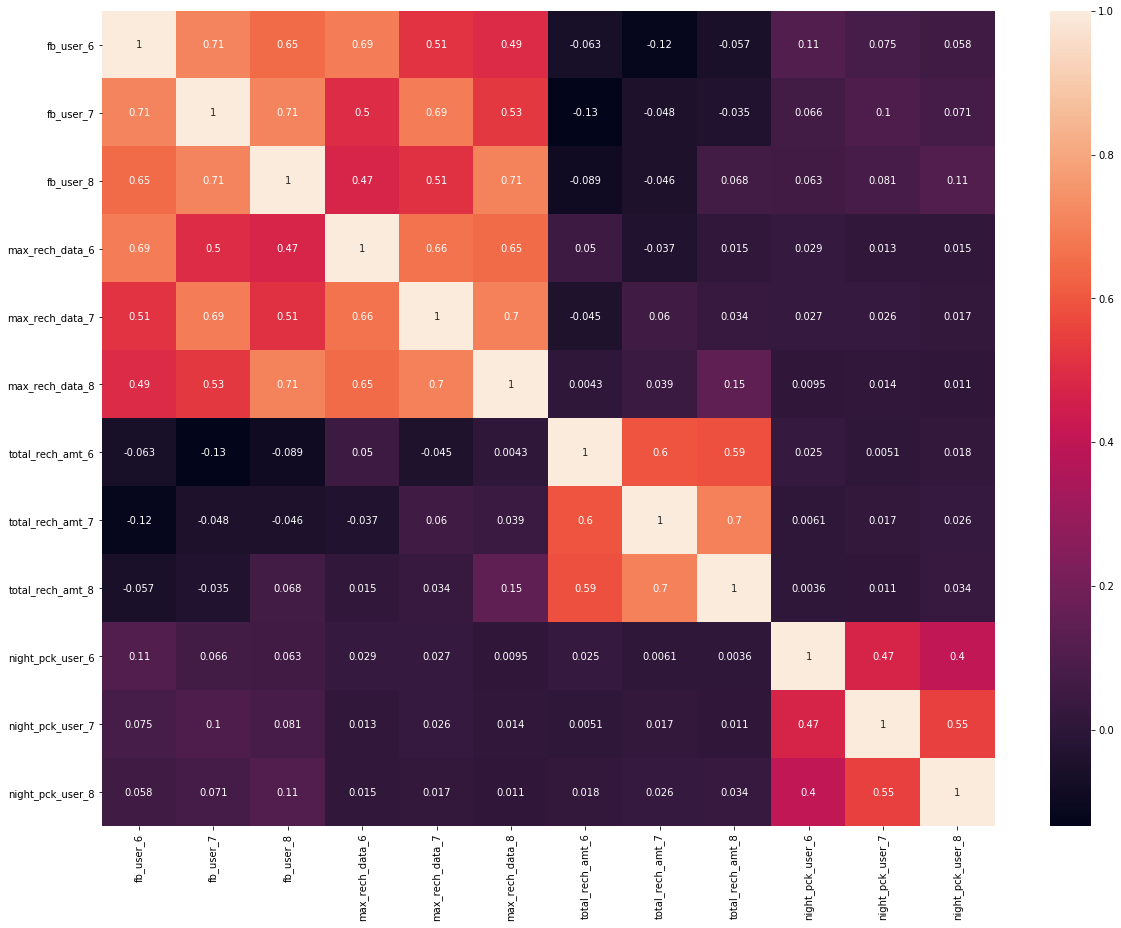

In [400]:
data = HVC_Data_final[['fb_user_6','fb_user_7', 'fb_user_8','max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8',  'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8','night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8']]
plt.figure(figsize = (20,15)) 
sns.heatmap(data.corr(),annot = True)
plt.show()

#### Observations
- no surprise,FB users usually recharge data packs
- night pack users are usually not data users

In [401]:
# These functions are required to create the plot for univariate or bivariate analysis
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariatePlot(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid data, expected numeric variable or a categorical vairable.")
        
def bivariatePlot(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

count    29949.000000
mean       577.006877
std        449.261901
min      -2258.709000
25%        345.808000
50%        490.933000
75%        702.776000
max      27731.088000
Name: arpu_6, dtype: float64


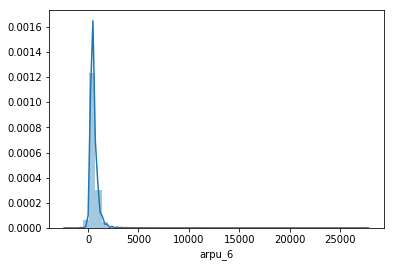

In [402]:
univariatePlot(HVC_Data_final.arpu_6)

#### Observations:
- arpu is quite less, which indicates that most are prepaid users

count    29949.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


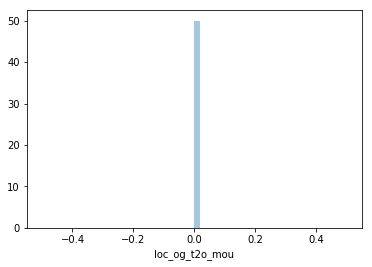

In [403]:
univariatePlot(HVC_Data_final.loc_og_t2o_mou)

#### Observations:
- people dont use loc_og_t2o_mou

count    29949.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


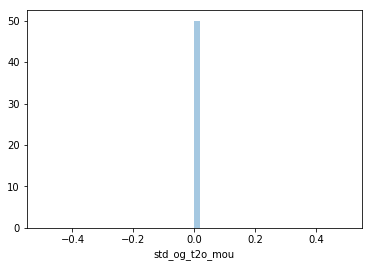

In [404]:
univariatePlot(HVC_Data_final.std_og_t2o_mou)

#### Observations:
- People dont use std_og_t2o_mou

count    29949.000000
mean       257.619650
std        465.113633
min      -1060.689601
25%         22.560000
50%         91.880000
75%        275.697951
max      10752.560000
Name: onnet_mou_8, dtype: float64


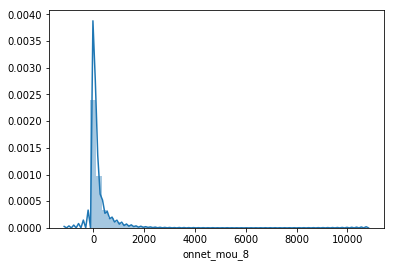

In [405]:
univariatePlot(HVC_Data_final.onnet_mou_8)


## Plot the Percentage of Churn and Non churn customer 

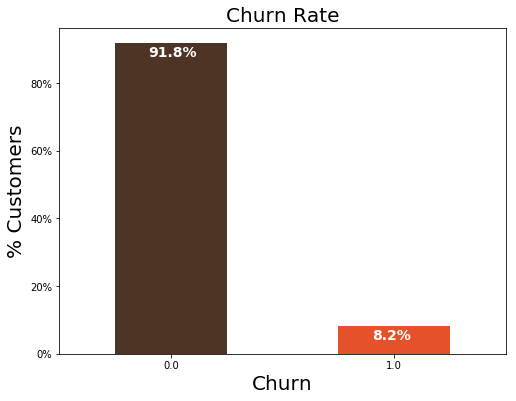

In [414]:
import matplotlib.ticker as mtick # For specifying the axes tick format 

#HVC_Data_final['churn'].replace(to_replace='Yes', value=1.0, inplace=True)
#HVC_Data_final['churn'].replace(to_replace='No',  value=0.0, inplace=True)

colors = ['#4D3425','#E4512B']
ax = (HVC_Data_final['churn'].value_counts()*100.0 /len(HVC_Data_final)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 20)
ax.set_xlabel('Churn',size = 20)
ax.set_title('Churn Rate', size = 20)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)


#### Observation: 
- 91.8 % of the customers have not churned.
- The data set has class imbalance, need to be taken care while building the model

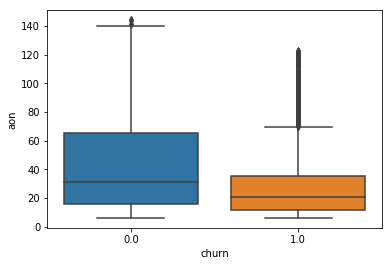

In [407]:
#Convert the number of days to number of months for easy visualisation of data.
HVC_Data_final['aon']=HVC_Data_final['aon'].div(30)

sns.boxplot(x = HVC_Data_final.churn, y = HVC_Data_final.aon)

#### Observation: 
- More number of customers stay for longer duration in the network.
- People who churn are relatively newer customers

Text(0.5, 1.0, '# of Customers by their tenure')

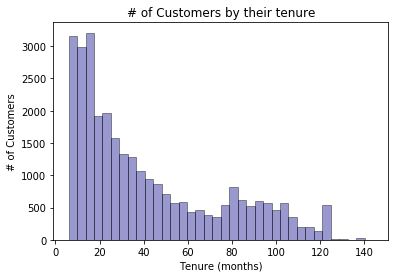

In [408]:
ax = sns.distplot(HVC_Data_final['aon'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

#### Observations:
- Majority of the customers have used for very less number of months
- Many customers initially joined the network,after that did not use the connection or moved to different network.

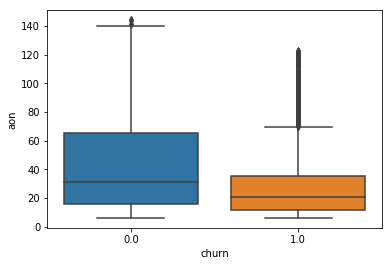

In [410]:
bivariatePlot(HVC_Data_final.churn, HVC_Data_final.aon)

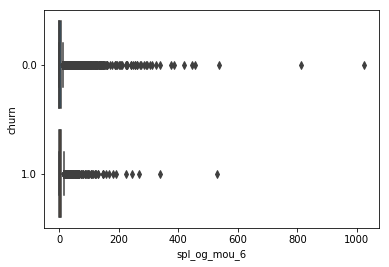

In [411]:
bivariatePlot(HVC_Data_final.spl_og_mou_6, HVC_Data_final.churn)

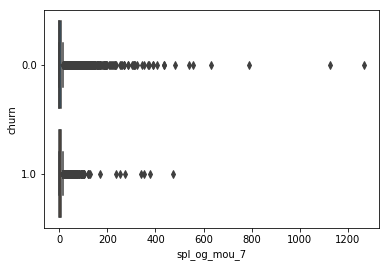

In [412]:
bivariatePlot(HVC_Data_final.spl_og_mou_7, HVC_Data_final.churn)

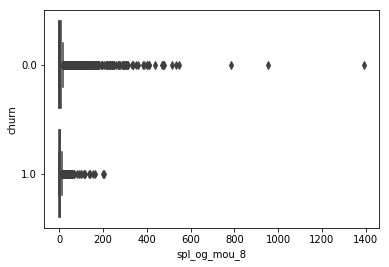

In [413]:
bivariatePlot(HVC_Data_final.spl_og_mou_8, HVC_Data_final.churn)

In [259]:
HVC_DF = HVC_Data_final

HVC_DF = HVC_DF.drop(datCols, axis =1)
HVC_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 169 entries, mobile_number to recharge_data_8
dtypes: category(7), float64(161), int64(1)
memory usage: 38.7 MB


In [260]:
HVC_DF.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
count,2.994900e+04,29949.0,29949.0,29949.0,29949.0,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,...,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000
mean,7.001216e+09,109.0,0.0,0.0,0.0,577.006877,578.921924,525.105455,276.585163,287.725567,...,0.180240,0.195032,0.175565,0.456977,0.462152,0.424555,1244.347958,164.539175,173.749613,153.984264
std,6.867758e+05,0.0,0.0,0.0,0.0,449.261901,469.335744,496.373165,461.757224,483.019580,...,0.940799,1.043847,1.037672,0.498154,0.498574,0.494284,970.958900,419.712551,444.482427,416.280454
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-128.095320,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000
25%,7.000631e+09,109.0,0.0,0.0,0.0,345.808000,347.071000,266.252000,26.680000,28.630000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,469.000000,0.000000,0.000000,0.000000
50%,7.001221e+09,109.0,0.0,0.0,0.0,490.933000,489.043000,443.470000,103.060000,106.490000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,884.000000,0.000000,0.000000,0.000000
75%,7.001806e+09,109.0,0.0,0.0,0.0,702.776000,700.512000,666.980000,320.530000,324.380000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1864.000000,104.960000,109.700000,75.270000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,29.000000,35.000000,41.000000,1.000000,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000


In [261]:
#columns loc_og_t2o_mou , std_og_t2o_mou and loc_ic_t2o_mou are giving much information
#let us drop these columns
HVC_DF = HVC_DF.drop(['loc_og_t2o_mou', 'std_og_t2o_mou' ,'loc_ic_t2o_mou','circle_id'], axis =1)
HVC_DF.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
count,2.994900e+04,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,...,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000
mean,7.001216e+09,577.006877,578.921924,525.105455,276.585163,287.725567,253.035498,396.934456,403.410408,355.334502,...,0.180240,0.195032,0.175565,0.456977,0.462152,0.424555,1244.347958,164.539175,173.749613,153.984264
std,6.867758e+05,449.261901,469.335744,496.373165,461.757224,483.019580,461.325071,477.440739,492.676747,479.136046,...,0.940799,1.043847,1.037672,0.498154,0.498574,0.494284,970.958900,419.712551,444.482427,416.280454
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,-128.095320,0.000000,-375.473139,-654.199638,-57.797892,-29.984217,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000
25%,7.000631e+09,345.808000,347.071000,266.252000,26.680000,28.630000,22.860000,104.580000,104.510000,72.460000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,469.000000,0.000000,0.000000,0.000000
50%,7.001221e+09,490.933000,489.043000,443.470000,103.060000,106.490000,90.840000,254.360000,258.080000,209.960000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,884.000000,0.000000,0.000000,0.000000
75%,7.001806e+09,702.776000,700.512000,666.980000,320.530000,324.380000,265.830000,508.490000,512.740000,459.760000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1864.000000,104.960000,109.700000,75.270000
max,7.002411e+09,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,...,29.000000,35.000000,41.000000,1.000000,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000


In [262]:
showMissingData(HVC_DF,0)

,0


In [263]:
#Let us clear the outliers in the dataframe
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [264]:
#Let us check for outliers
def return_IQR_L(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    return fence_low

def return_IQR_H(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_high = q3+1.5*iqr
    return fence_high



In [265]:
# get numeric values
HVC_Data_numeric_temp = HVC_DF.select_dtypes(include =['float64','int64']) 

HVC_DF_IQR = pd.DataFrame(columns=['col','IQR_L','IQR_H','min','max'])

for col in HVC_Data_numeric_temp.columns:
    L = return_IQR_L(HVC_DF,col)
    H = return_IQR_H(HVC_DF,col)
    lst = [col,L,H,HVC_DF[col].min(),HVC_DF[col].max()]
    df = pd.DataFrame([lst], columns=['col','IQR_L','IQR_H','min','max'])
    HVC_DF_IQR = HVC_DF_IQR.append(df,ignore_index=True)
HVC_DF_IQR

,col,IQR_L,IQR_H,min,max
0,mobile_number,6.998869e+09,7.003568e+09,7000000074,7002410905
1,arpu_6,-1.896440e+02,1.238228e+03,-2258.71,27731.1
2,arpu_7,-1.830905e+02,1.230673e+03,-2014.05,35145.8
3,arpu_8,-3.348400e+02,1.268072e+03,-945.808,33543.6
4,onnet_mou_6,-4.140950e+02,7.613050e+02,-128.095,7376.71
5,onnet_mou_7,-4.149950e+02,7.680050e+02,0,8157.78
6,onnet_mou_8,-3.415950e+02,6.302850e+02,-375.473,10752.6
7,offnet_mou_6,-5.012850e+02,1.114355e+03,-654.2,8362.36
8,offnet_mou_7,-5.078350e+02,1.125085e+03,-57.7979,9667.13
9,offnet_mou_8,-5.084900e+02,1.040710e+03,-29.9842,14007.3


In [266]:
#Let us filter the columns which has outliers
cols_with_outliers = []
for i in range(0,len(HVC_DF_IQR.index)): 
    if((HVC_DF_IQR.loc[i,'max'] > 1) & (HVC_DF_IQR.loc[i,'IQR_H'] < HVC_DF_IQR.loc[i,'max']) & (HVC_DF_IQR.loc[i,'min'] < HVC_DF_IQR.loc[i,'IQR_L'])):
        cols_with_outliers.append(HVC_DF_IQR.loc[i,'col']) 
cols_with_outliers

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_8',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'og_others_7',
 'og_others_8',
 'std_ic_t2m_mou_6',
 'std_ic_mou_6',
 'spl_ic_mou_7',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'arpu_3g_8',
 'arpu_2g_8']

In [267]:
showMissingData(HVC_DF,0)
HVC_DF_1 = HVC_DF

In [268]:
HVC_DF = HVC_DF_1

In [269]:
for col in cols_with_outliers:
    HVC_DF_FINAL = remove_outlier(HVC_DF, col)

In [270]:
HVC_DF_FINAL.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
count,2.351100e+04,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,...,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000
mean,7.001213e+09,572.302637,568.074159,489.243397,308.723256,319.630209,277.120668,429.625418,435.487912,376.571895,...,0.084343,0.076858,0.019906,0.351367,0.345923,0.268215,1224.429161,84.970862,101.665093,91.878393
std,6.914885e+05,439.343685,462.744000,483.678106,482.777923,504.962801,480.996985,498.324698,518.056223,500.427562,...,0.544793,0.476237,0.165595,0.477408,0.475678,0.443040,958.101913,269.827107,309.547138,296.306996
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,-128.095320,0.000000,-375.473139,-64.228328,-57.797892,-29.984217,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000
25%,7.000616e+09,353.834500,353.003000,249.518500,34.510000,35.780000,26.970000,121.560000,119.350000,78.460000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,472.000000,0.000000,0.000000,0.000000
50%,7.001214e+09,493.343000,487.526000,422.386000,124.290000,126.560000,104.510000,282.390000,283.810000,226.340000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,869.000000,0.000000,0.000000,0.000000
75%,7.001811e+09,696.621000,684.059500,629.819500,373.935000,382.860000,304.845000,551.735000,559.825000,490.090000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1793.500000,0.000000,0.000000,0.000000
max,7.002411e+09,27731.088000,35145.834000,33543.624000,7376.710000,7741.530000,10752.560000,8362.360000,9667.130000,14007.340000,...,28.000000,19.000000,8.000000,1.000000,1.000000,1.000000,4235.000000,6686.880000,5703.530000,7581.250000


In [271]:
HVC_DF.columns.values

array(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7

In [272]:
showMissingData(HVC_DF_FINAL,0)

,0


## Model 1 : Logistic Regression with RFE

In [273]:
# Putting feature variable to X
X = HVC_DF_FINAL.drop(['churn','mobile_number'], axis=1)

X.head()


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,recharge_6,recharge_7,recharge_8,recharge_data_6,recharge_data_7,recharge_data_8
index1,,,,,,,,,,,,,,,,,,,,,
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,802.0,57.74,19.38,18.74,1,1,1,0,0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,315.0,21.03,910.65,122.16,1,1,1,0,1,1
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,511.0,0.00,2.45,21.89,1,1,1,0,0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,720.0,0.00,0.00,0.00,1,1,1,0,0,0
38,363.987,486.558,393.909,248.99,619.96,666.38,88.86,50.58,97.81,0.00,...,1155.0,0.00,0.00,0.00,1,1,1,0,0,0


In [274]:
# Putting response variable to y
y = HVC_DF_FINAL['churn']

y.head()

index1
7     1.0
8     0.0
16    0.0
21    0.0
38    0.0
Name: churn, dtype: category
Categories (2, float64): [0.0, 1.0]

In [275]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [276]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16457 entries, 93413 to 23787
Columns: 163 entries, arpu_6 to recharge_data_8
dtypes: category(6), float64(157)
memory usage: 19.9 MB


### Feature Scaling

In [277]:
scaler = StandardScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,recharge_6,recharge_7,recharge_8,recharge_data_6,recharge_data_7,recharge_data_8
index1,,,,,,,,,,,,,,,,,,,,,
93413,-0.802384,0.068745,-0.713829,-0.644301,-0.628743,-0.574186,-0.860408,-0.836364,-0.759123,-0.222875,...,-0.915781,6.769395,3.301845,4.203869,0.043443,0.061991,0.157428,1.225800,1.232188,1.388254
62525,-0.125052,-0.323104,0.375845,-0.576966,-0.470120,-0.347316,-0.566732,-0.610018,-0.358582,-0.222875,...,-1.024606,-0.311374,-0.331680,-0.313893,0.043443,0.061991,0.157428,-0.815794,-0.811565,-0.720329
55435,0.014252,-0.754425,-0.470537,-0.610385,-0.628743,-0.265054,-0.057923,-0.833766,-0.622232,1.790573,...,-0.677205,-0.311374,-0.331680,-0.301109,0.043443,0.061991,0.157428,-0.815794,1.232188,1.388254
99579,0.060143,-0.103977,-0.377169,-0.399172,-0.395347,-0.440089,-0.198774,-0.213017,-0.555274,0.209739,...,-0.191680,0.564484,0.883227,4.216893,0.043443,0.061991,0.157428,1.225800,1.232188,1.388254
36509,-0.547154,-0.283515,-0.288063,-0.598032,-0.591599,-0.518198,-0.543023,-0.508126,-0.383414,-0.222875,...,-0.543267,0.605972,0.915527,0.043588,0.043443,0.061991,0.157428,1.225800,1.232188,-0.720329


In [278]:
### Checking the Churn Rate
churn = (sum(HVC_DF_FINAL['churn'])/len(HVC_DF_FINAL['churn'].index))*100
churn

9.820934881544808

#### We need to handle class imbalance as only 9.8% of the data is churn data

In [279]:
# Let us use class_weight='balanced_subsample' to handle class imbalance in our data
logreg = LogisticRegression(class_weight='balanced_subsample')

In [280]:

rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [281]:
rfe.support_

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,

In [282]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 81),
 ('arpu_7', True, 1),
 ('arpu_8', False, 28),
 ('onnet_mou_6', False, 103),
 ('onnet_mou_7', False, 46),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 2),
 ('offnet_mou_7', False, 136),
 ('offnet_mou_8', False, 16),
 ('roam_ic_mou_6', False, 108),
 ('roam_ic_mou_7', False, 48),
 ('roam_ic_mou_8', False, 129),
 ('roam_og_mou_6', False, 104),
 ('roam_og_mou_7', False, 69),
 ('roam_og_mou_8', False, 67),
 ('loc_og_t2t_mou_6', False, 5),
 ('loc_og_t2t_mou_7', False, 68),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 51),
 ('loc_og_t2m_mou_7', False, 45),
 ('loc_og_t2m_mou_8', False, 13),
 ('loc_og_t2f_mou_6', False, 80),
 ('loc_og_t2f_mou_7', False, 53),
 ('loc_og_t2f_mou_8', False, 77),
 ('loc_og_t2c_mou_6', False, 91),
 ('loc_og_t2c_mou_7', False, 94),
 ('loc_og_t2c_mou_8', False, 142),
 ('loc_og_mou_6', False, 27),
 ('loc_og_mou_7', False, 42),
 ('loc_og_mou_8', False, 14),
 ('std_og_t2t_mou_6', False, 3),
 ('std_og_t2t_mou_7', False, 47),
 (

In [283]:
col = X_train.columns[rfe.support_]

In [284]:
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8',
       ...
       'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'recharge_6', 'recharge_7',
       'recharge_8', 'recharge_data_6', 'recharge_data_7', 'recharge_data_8'],
      dtype='object', length=148)

In [285]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                16457
Model:                            GLM   Df Residuals:                    16441
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3506.3
Date:                Sun, 23 Feb 2020   Deviance:                       7012.6
Time:                        13:46:01   Pearson chi2:                 3.03e+05
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.5459      0.068    -52.376      0.000      -3.679      -3.413
arpu_7                 0.7068      0.048     14.857      0.000       0.614       0.800
onnet_mou_8            1.6460      0.189      8.688      0.000       1.275       2.017
loc_og_t2t_mou_8      -0.6408      0.170     -3.761      0.000      -0.975      -0.307
std_og_t2m_mou_8       1.4135      0.182      7.778      0.000       1.057       1.770
std_og_mou_8          -1.3416      0.352     -3.811      0.000      -2.032      -0.652
total_og_mou_8        -1.4253      0.290     -4.913      0.000      -1.994      -0.857
loc_ic_t2t_mou_8       1.7559      0.338      5.201      0.000       1.094       2.418
loc_ic_t2m_mou_8       1.7068      0.457      3.734      0.000       0.811       2.603
loc_ic_mou_8           1.0569      0.521      2.028      0.043       0.035       2.078
std_ic_t2t_mou_8       1.0041      0.128      7.827      0.000       0.753       1.256
std_ic_t2m_mou_8       1.4134      0.129     10.977      0.000       1.161       1.666
total_ic_mou_8        -5.8808      0.419    -14.050      0.000      -6.701      -5.060
isd_ic_mou_8           1.0942      0.114      9.614      0.000       0.871       1.317
total_rech_amt_8      -0.8981      0.088    -10.251      0.000      -1.070      -0.726
av_rech_amt_data_8    -0.8338      0.068    -12.325      0.000      -0.966      -0.701
======================================================================================
"""

In [286]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

index1
93413    0.038919
62525    0.044479
55435    0.056482
99579    0.034621
36509    0.045206
44335    0.064194
74820    0.384869
43445    0.004210
74479    0.060677
18499    0.057030
dtype: float64

In [287]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0389193 , 0.04447855, 0.05648243, 0.03462071, 0.04520615,
       0.06419413, 0.38486859, 0.00420994, 0.06067665, 0.05703014])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [288]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0.0,0.038919,93413
1,0.0,0.044479,62525
2,0.0,0.056482,55435
3,0.0,0.034621,99579
4,0.0,0.045206,36509


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [289]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0.0,0.038919,93413,0
1,0.0,0.044479,62525,0
2,0.0,0.056482,55435,0
3,0.0,0.034621,99579,0
4,0.0,0.045206,36509,0


In [290]:
from sklearn import metrics

In [291]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[14660   155]
 [ 1122   520]]


In [292]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9224038403111138


In [293]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [294]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,std_og_mou_8,75.80
8,loc_ic_mou_8,59.09
1,onnet_mou_8,36.04
11,total_ic_mou_8,36.04
3,std_og_t2m_mou_8,29.30
7,loc_ic_t2m_mou_8,25.72
5,total_og_mou_8,14.03
6,loc_ic_t2t_mou_8,13.93
2,loc_og_t2t_mou_8,11.31
10,std_ic_t2m_mou_8,3.54


In [295]:
col = col.drop('std_og_mou_8', 1)
col

Index(['arpu_7', 'onnet_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'total_ic_mou_8', 'isd_ic_mou_8', 'total_rech_amt_8',
       'av_rech_amt_data_8'],
      dtype='object')

In [296]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                16457
Model:                            GLM   Df Residuals:                    16442
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3513.5
Date:                Sun, 23 Feb 2020   Deviance:                       7026.9
Time:                        13:46:38   Pearson chi2:                 3.40e+06
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.5803      0.068    -52.990      0.000      -3.713      -3.448
arpu_7                 0.6977      0.048     14.674      0.000       0.605       0.791
onnet_mou_8            1.2094      0.137      8.830      0.000       0.941       1.478
loc_og_t2t_mou_8      -0.1297      0.101     -1.285      0.199      -0.328       0.068
std_og_t2m_mou_8       1.0057      0.135      7.450      0.000       0.741       1.270
total_og_mou_8        -2.2907      0.203    -11.278      0.000      -2.689      -1.893
loc_ic_t2t_mou_8       1.9509      0.341      5.719      0.000       1.282       2.619
loc_ic_t2m_mou_8       2.1186      0.456      4.645      0.000       1.225       3.013
loc_ic_mou_8           1.1802      0.539      2.188      0.029       0.123       2.237
std_ic_t2t_mou_8       1.1052      0.129      8.591      0.000       0.853       1.357
std_ic_t2m_mou_8       1.5558      0.127     12.227      0.000       1.306       1.805
total_ic_mou_8        -6.4515      0.406    -15.894      0.000      -7.247      -5.656
isd_ic_mou_8           1.2002      0.114     10.549      0.000       0.977       1.423
total_rech_amt_8      -0.7884      0.082     -9.667      0.000      -0.948      -0.629
av_rech_amt_data_8    -0.8491      0.067    -12.583      0.000      -0.981      -0.717
======================================================================================
"""

In [297]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.04150834, 0.04207549, 0.04528796, 0.03368817, 0.04484769,
       0.05593971, 0.39019321, 0.00384901, 0.06144724, 0.06045189])

In [298]:
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0.0,0.041508,93413,0
1,0.0,0.042075,62525,0
2,0.0,0.045288,55435,0
3,0.0,0.033688,99579,0
4,0.0,0.044848,36509,0


In [299]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9225253691438293


So overall the accuracy hasn't dropped much.

In [301]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,loc_ic_mou_8,57.55
10,total_ic_mou_8,33.70
6,loc_ic_t2m_mou_8,25.68
5,loc_ic_t2t_mou_8,13.93
4,total_og_mou_8,11.68
1,onnet_mou_8,5.79
3,std_og_t2m_mou_8,4.85
9,std_ic_t2m_mou_8,3.39
12,total_rech_amt_8,3.30
0,arpu_7,2.67


In [302]:
col = col.drop('loc_ic_mou_8', 1)
col

Index(['arpu_7', 'onnet_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'total_ic_mou_8',
       'isd_ic_mou_8', 'total_rech_amt_8', 'av_rech_amt_data_8'],
      dtype='object')

In [303]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                16457
Model:                            GLM   Df Residuals:                    16443
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3516.1
Date:                Sun, 23 Feb 2020   Deviance:                       7032.3
Time:                        13:47:02   Pearson chi2:                 3.01e+06
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.6068      0.066    -54.268      0.000      -3.737      -3.477
arpu_7                 0.6993      0.048     14.717      0.000       0.606       0.792
onnet_mou_8            1.2207      0.136      8.955      0.000       0.954       1.488
loc_og_t2t_mou_8      -0.1282      0.101     -1.267      0.205      -0.326       0.070
std_og_t2m_mou_8       1.0148      0.134      7.563      0.000       0.752       1.278
total_og_mou_8        -2.3097      0.202    -11.427      0.000      -2.706      -1.914
loc_ic_t2t_mou_8       2.5665      0.211     12.175      0.000       2.153       2.980
loc_ic_t2m_mou_8       2.9847      0.255     11.703      0.000       2.485       3.485
std_ic_t2t_mou_8       1.1035      0.128      8.624      0.000       0.853       1.354
std_ic_t2m_mou_8       1.5610      0.125     12.466      0.000       1.316       1.806
total_ic_mou_8        -6.4509      0.399    -16.158      0.000      -7.233      -5.668
isd_ic_mou_8           1.2013      0.113     10.649      0.000       0.980       1.422
total_rech_amt_8      -0.7937      0.082     -9.738      0.000      -0.953      -0.634
av_rech_amt_data_8    -0.8515      0.068    -12.615      0.000      -0.984      -0.719
======================================================================================
"""

In [304]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.03774407, 0.04326807, 0.04857527, 0.03297381, 0.04279793,
       0.05387079, 0.39205018, 0.00303896, 0.06126209, 0.06258457])

In [305]:
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0.0,0.037744,93413,0
1,0.0,0.043268,62525,0
2,0.0,0.048575,55435,0
3,0.0,0.032974,99579,0
4,0.0,0.042798,36509,0


In [306]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9225861335601871


So overall the accuracy hasn't dropped much.

In [307]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_ic_mou_8,26.18
4,total_og_mou_8,11.65
6,loc_ic_t2m_mou_8,10.97
5,loc_ic_t2t_mou_8,6.23
1,onnet_mou_8,5.78
3,std_og_t2m_mou_8,4.85
11,total_rech_amt_8,3.30
8,std_ic_t2m_mou_8,2.88
0,arpu_7,2.67
7,std_ic_t2t_mou_8,2.21


In [308]:
col = col.drop('total_ic_mou_8', 1)
col

Index(['arpu_7', 'onnet_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'isd_ic_mou_8',
       'total_rech_amt_8', 'av_rech_amt_data_8'],
      dtype='object')

In [309]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                16457
Model:                            GLM   Df Residuals:                    16444
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3755.2
Date:                Sun, 23 Feb 2020   Deviance:                       7510.5
Time:                        13:47:23   Pearson chi2:                 4.49e+09
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.5749      0.061    -58.591      0.000      -3.695      -3.455
arpu_7                 0.7244      0.048     15.039      0.000       0.630       0.819
onnet_mou_8            2.6931      0.142     18.980      0.000       2.415       2.971
loc_og_t2t_mou_8      -0.1086      0.089     -1.227      0.220      -0.282       0.065
std_og_t2m_mou_8       2.3321      0.140     16.704      0.000       2.058       2.606
total_og_mou_8        -4.5081      0.205    -21.963      0.000      -4.910      -4.106
loc_ic_t2t_mou_8      -0.0964      0.065     -1.491      0.136      -0.223       0.030
loc_ic_t2m_mou_8      -0.2992      0.078     -3.845      0.000      -0.452      -0.147
std_ic_t2t_mou_8      -0.1532      0.076     -2.029      0.043      -0.301      -0.005
std_ic_t2m_mou_8      -0.0382      0.042     -0.918      0.359      -0.120       0.043
isd_ic_mou_8          -0.2819      0.108     -2.605      0.009      -0.494      -0.070
total_rech_amt_8      -1.1428      0.091    -12.613      0.000      -1.320      -0.965
av_rech_amt_data_8    -0.9704      0.069    -14.054      0.000      -1.106      -0.835
======================================================================================
"""

In [310]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.081319  , 0.02921223, 0.02125491, 0.03361606, 0.06017965,
       0.04581636, 0.435392  , 0.01372884, 0.05853583, 0.08404034])

In [311]:
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0.0,0.081319,93413,0
1,0.0,0.029212,62525,0
2,0.0,0.021255,55435,0
3,0.0,0.033616,99579,0
4,0.0,0.060180,36509,0


In [312]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9100078993741265


In [313]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_og_mou_8,11.35
1,onnet_mou_8,5.64
3,std_og_t2m_mou_8,4.73
10,total_rech_amt_8,3.28
0,arpu_7,2.66
2,loc_og_t2t_mou_8,1.39
6,loc_ic_t2m_mou_8,1.38
5,loc_ic_t2t_mou_8,1.12
7,std_ic_t2t_mou_8,1.07
8,std_ic_t2m_mou_8,1.07


In [314]:
col = col.drop('total_og_mou_8', 1)
col

Index(['arpu_7', 'onnet_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'isd_ic_mou_8', 'total_rech_amt_8',
       'av_rech_amt_data_8'],
      dtype='object')

In [315]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                16457
Model:                            GLM   Df Residuals:                    16445
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4086.2
Date:                Sun, 23 Feb 2020   Deviance:                       8172.4
Time:                        13:48:27   Pearson chi2:                 1.07e+06
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.3359      0.059    -57.011      0.000      -3.451      -3.221
arpu_7                 0.7577      0.047     16.045      0.000       0.665       0.850
onnet_mou_8            0.0066      0.054      0.120      0.904      -0.100       0.113
loc_og_t2t_mou_8      -0.5801      0.118     -4.911      0.000      -0.812      -0.349
std_og_t2m_mou_8      -0.2079      0.056     -3.685      0.000      -0.318      -0.097
loc_ic_t2t_mou_8      -0.0281      0.055     -0.511      0.609      -0.136       0.080
loc_ic_t2m_mou_8      -0.9635      0.083    -11.573      0.000      -1.127      -0.800
std_ic_t2t_mou_8      -0.1497      0.071     -2.109      0.035      -0.289      -0.011
std_ic_t2m_mou_8       0.0119      0.034      0.352      0.725      -0.054       0.078
isd_ic_mou_8          -0.6241      0.154     -4.058      0.000      -0.926      -0.323
total_rech_amt_8      -1.7597      0.092    -19.175      0.000      -1.940      -1.580
av_rech_amt_data_8    -0.9705      0.070    -13.841      0.000      -1.108      -0.833
======================================================================================
"""

In [316]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.05302182, 0.05279245, 0.00807255, 0.04141559, 0.0766733 ,
       0.10870369, 0.47359326, 0.01941632, 0.05990442, 0.08180768])

In [317]:
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0.0,0.053022,93413,0
1,0.0,0.052792,62525,0
2,0.0,0.008073,55435,0
3,0.0,0.041416,99579,0
4,0.0,0.076673,36509,0


In [318]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9015008810840371


In [319]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_rech_amt_8,3.03
0,arpu_7,2.65
1,onnet_mou_8,1.44
2,loc_og_t2t_mou_8,1.35
3,std_og_t2m_mou_8,1.16
4,loc_ic_t2t_mou_8,1.12
5,loc_ic_t2m_mou_8,1.12
6,std_ic_t2t_mou_8,1.07
7,std_ic_t2m_mou_8,1.07
10,av_rech_amt_data_8,1.06


## Accuracy over 90% with VIFs of the attributes less than 5

## Let us compute sensitivity(Recall) and check the data as we do not want to wrongly classify churn

In [320]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [321]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.3166869671132765

In [322]:
# Let us calculate specificity
TN / float(TN+FP)

0.9895376307796152

In [323]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.010462369220384746


In [324]:
# positive predictive value 
print (TP / float(TP+FP))

0.7703703703703704


In [325]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9289063490051958


###  Plotting the ROC Curve

In [326]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [327]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

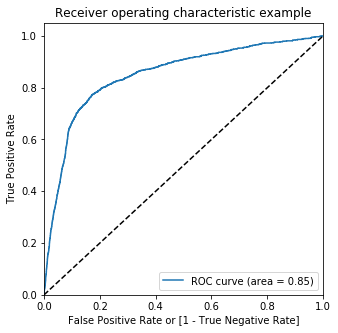

In [328]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Finding Optimal Cutoff Point

In [329]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.053022,93413,0,1,0,0,0,0,0,0,0,0,0
1,0.0,0.052792,62525,0,1,0,0,0,0,0,0,0,0,0
2,0.0,0.008073,55435,0,1,0,0,0,0,0,0,0,0,0
3,0.0,0.041416,99579,0,1,0,0,0,0,0,0,0,0,0
4,0.0,0.076673,36509,0,1,0,0,0,0,0,0,0,0,0


In [330]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.099775  1.000000  0.000000
0.1   0.1  0.743453  0.827040  0.734188
0.2   0.2  0.866622  0.696711  0.885454
0.3   0.3  0.892447  0.434836  0.943166
0.4   0.4  0.903081  0.211328  0.979750
0.5   0.5  0.901501  0.079781  0.992575
0.6   0.6  0.900589  0.032278  0.996828
0.7   0.7  0.900893  0.018270  0.998718
0.8   0.8  0.900711  0.009744  0.999460
0.9   0.9  0.900164  0.001218  0.999798


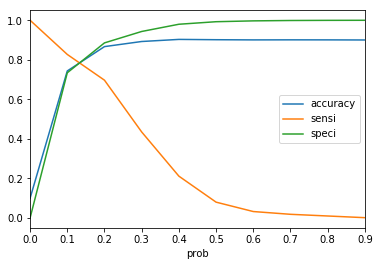

In [331]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [332]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.053022,93413,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,0.052792,62525,0,1,0,0,0,0,0,0,0,0,0,0
2,0.0,0.008073,55435,0,1,0,0,0,0,0,0,0,0,0,0
3,0.0,0.041416,99579,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.076673,36509,0,1,0,0,0,0,0,0,0,0,0,0


In [333]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7434526341374491

In [334]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[10877,  3938],
       [  284,  1358]], dtype=int64)

In [335]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print("sensitivity : ", TP / float(TP+FN))

# Let us calculate specificity
print("specificity : ", TN / float(TN+FP))

sensitivity :  0.8270401948842875
specificity :  0.7341883226459669


## Model 2 : Logistic Regression with Principal Component Analysis

In [336]:
X_train.shape

(16457, 163)

In [337]:
pca = PCA(svd_solver='randomized', random_state=42)

In [338]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components on the first 2 principal components as axes

In [339]:
pca.components_

array([[ 8.96466216e-02,  9.64442325e-02,  9.21230460e-02, ...,
        -1.70876272e-01, -1.71383925e-01, -1.38718276e-01],
       [ 8.29080061e-02,  8.83724635e-02,  9.91241012e-02, ...,
         3.46785827e-02,  3.46922590e-02,  4.05787129e-02],
       [ 1.38034571e-01,  1.78318522e-01,  1.74500174e-01, ...,
         8.48334926e-02,  1.01529998e-01,  1.24179253e-01],
       ...,
       [ 0.00000000e+00, -1.17238244e-16,  2.51134822e-16, ...,
        -1.18010161e-16, -3.27922228e-16,  4.70560754e-17],
       [-0.00000000e+00,  3.12289020e-17, -1.05847309e-16, ...,
         3.40543733e-16,  2.37485550e-16,  4.37471096e-18],
       [ 0.00000000e+00, -1.65651780e-16, -1.30168848e-16, ...,
         2.86857229e-17, -1.09802358e-16, -1.35222003e-16]])

In [340]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.089647,0.082908,arpu_6
1,0.096444,0.088372,arpu_7
2,0.092123,0.099124,arpu_8
3,0.102087,-0.024263,onnet_mou_6
4,0.108634,-0.023672,onnet_mou_7


In [341]:
pca.explained_variance_ratio_

array([1.07815457e-01, 7.62831130e-02, 5.70690956e-02, 4.74888724e-02,
       3.88341115e-02, 3.44234471e-02, 3.02340033e-02, 2.90155916e-02,
       2.47054063e-02, 2.21313489e-02, 2.10413335e-02, 2.02088699e-02,
       1.85619478e-02, 1.76467748e-02, 1.68124871e-02, 1.66961029e-02,
       1.64425124e-02, 1.60159552e-02, 1.50506487e-02, 1.42714573e-02,
       1.28101177e-02, 1.26473277e-02, 1.16593358e-02, 1.13294131e-02,
       1.05428345e-02, 9.85278706e-03, 9.35539128e-03, 8.71781182e-03,
       8.58389019e-03, 8.30703521e-03, 8.17384713e-03, 7.94379797e-03,
       7.46110355e-03, 7.24405879e-03, 7.13699101e-03, 6.91496364e-03,
       6.79725860e-03, 6.59534395e-03, 6.07498460e-03, 5.80700464e-03,
       5.76408119e-03, 5.62396023e-03, 5.41521544e-03, 5.34844485e-03,
       5.21105958e-03, 5.12047884e-03, 4.93466130e-03, 4.80092375e-03,
       4.75671272e-03, 4.62728355e-03, 4.53523920e-03, 4.43652720e-03,
       4.38634348e-03, 4.21306639e-03, 4.13202389e-03, 3.93047027e-03,
      

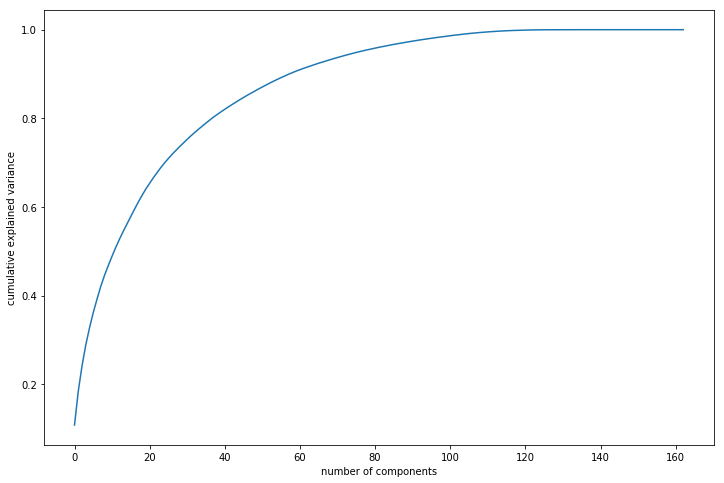

In [342]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 50 components are enough to describe 90% of the variance in the dataset
- We'll choose 50 components for our modeling

In [343]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

In [344]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(16457, 50)

In [345]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())


In [346]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.015449959023484535 , min corr:  -0.010464535699005455


#### there is no correlation between any two components
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [347]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(7054, 50)

In [348]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
learner_pca = LogisticRegression(class_weight='balanced_subsample')

model_pca = learner_pca.fit(df_train_pca,y_train)

In [349]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.82'

#### Let us try with variance cutoff of 90

In [350]:
pca_again = PCA(0.90)

In [351]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape

(16457, 59)

In [352]:
#training the regression model
learner_pca2 = LogisticRegression(class_weight='balanced_subsample')
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

In [353]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(7054, 59)

variance of 90 as cutoff chose 59 components

In [354]:
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.83'

###  Let us just choose 15 PCs and build our model

In [355]:
pca_last = PCA(n_components=15)
df_train_pca3 = pca_last.fit_transform(X_train)
df_test_pca3 = pca_last.transform(X_test)
df_test_pca3.shape

(7054, 15)

In [356]:
#training the regression model
learner_pca3 = LogisticRegression(class_weight='balanced_subsample')
model_pca3 = learner_pca3.fit(df_train_pca3,y_train)
#Making prediction on the test data
pred_probs_test3 = model_pca3.predict_proba(df_test_pca3)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test3))

'0.83'

### 15 PCs , we got auc of 83

pca_again = PCA(0.90)

In [33]:
# Pending Work
# Outlier removal use 1.5 percentile rule
# class imbalance need to be taken care of
1.visualise data
2.Univariate EDA
3.Bivariate EDA
4.Modelling--both
5.PCA
6.PCA and Logistic Regression
7.Random Forest
#

SyntaxError: invalid syntax (<ipython-input-33-1480f8beeb2e>, line 3)